## Module 4 Showcase polynomial regression with different parameters


In [1]:
import pandas as pd
print("pandas version: %s" % pd.__version__)
import matplotlib
print("matplotlib version: %s" % matplotlib.__version__)
import numpy as np
print("numpy version: %s" % np.__version__)
import IPython
print("IPython version: %s" % IPython.__version__)
import sklearn
print("scikit-learn version: %s" % sklearn.__version__)
import math


pandas version: 1.1.4
matplotlib version: 3.3.3
numpy version: 1.17.0
IPython version: 7.16.1
scikit-learn version: 0.24.2


### Let's first showcase a simple example with a simple synthecic sinus curve 


In [2]:
nof_xvalues = 30


In [3]:
testlinspace =np.linspace(0,1, num =nof_xvalues)

In [4]:
testlinspace

array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])

In [5]:
xvalues = testlinspace *2*3.14

In [6]:
xvalues

array([0.        , 0.21655172, 0.43310345, 0.64965517, 0.8662069 ,
       1.08275862, 1.29931034, 1.51586207, 1.73241379, 1.94896552,
       2.16551724, 2.38206897, 2.59862069, 2.81517241, 3.03172414,
       3.24827586, 3.46482759, 3.68137931, 3.89793103, 4.11448276,
       4.33103448, 4.54758621, 4.76413793, 4.98068966, 5.19724138,
       5.4137931 , 5.63034483, 5.84689655, 6.06344828, 6.28      ])

In [7]:
xvalues.shape


(30,)

In [8]:

sinxvalues = np.sin(xvalues)
#sinxvalues[0:15] = 0
print("sin values ", sinxvalues)




sin values  [ 0.          0.21486317  0.41968972  0.60491186  0.76187755  0.88325467
  0.96337347  0.99849149  0.9869683   0.92934216  0.8283049   0.68857612
  0.5166828   0.32065435  0.10964761 -0.10648096 -0.31763562 -0.51395299
 -0.68626276 -0.82651604 -0.92816137 -0.98645073 -0.99866132 -0.96422277
 -0.88474375 -0.76393687 -0.60744522 -0.42257878 -0.21797299 -0.0031853 ]


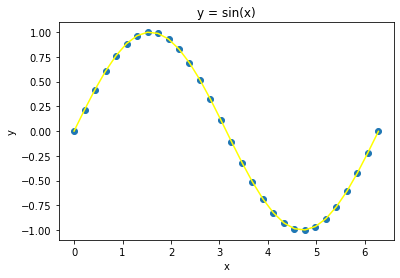

In [9]:
from matplotlib import pyplot as plt

plt.xlabel("x")
plt.ylabel("y")
plt.title("y = sin(x)")
plt.scatter(xvalues, sinxvalues)
plt.plot(xvalues, sinxvalues, c= "yellow")

In [10]:


randomynoise= (np.random.random(nof_xvalues)-0.5)*0.5 





(array([3., 5., 7., 1., 1., 3., 3., 2., 2., 3.]),
 array([-0.2491535 , -0.20026958, -0.15138566, -0.10250174, -0.05361782,
        -0.0047339 ,  0.04415002,  0.09303394,  0.14191786,  0.19080178,
         0.23968571]),
 <BarContainer object of 10 artists>)

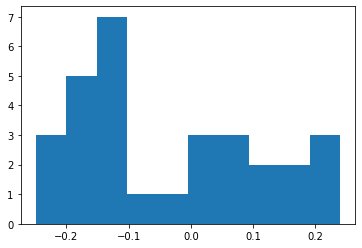

In [11]:
plt.hist(randomynoise)

In [12]:
mu, sigma = 0, 0.1 # mean and standard deviation
randomynoise = np.random.normal(mu, sigma, nof_xvalues)

In [13]:
#print("y values ", yvalues)

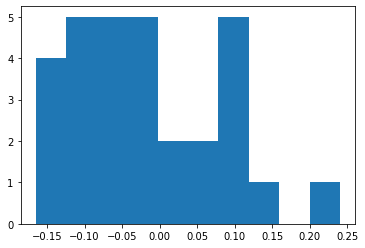

In [14]:
plt.hist(randomynoise)
yvalues = sinxvalues+randomynoise 

Let's plot the data

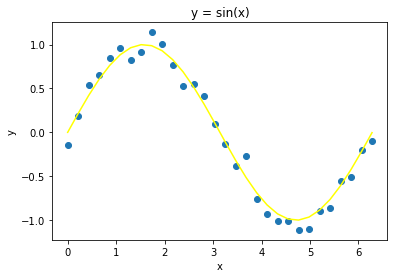

In [15]:
from matplotlib import pyplot as plt

plt.scatter(xvalues, yvalues)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = sin(x)")
plt.plot(xvalues, sinxvalues, c= "yellow")


How can we find a model for this by linear regression
    - We know y = sin(x) would be the best model, but don't have this information
    - So we try to approximate the curve with a set of linear models, e.g. polynomial of different degrees


    

$y = \beta_0 + \beta_1x$ or 

$y = \beta_0 + \beta_1x + \beta_2x^2$ or 

$y = \beta_0 + \beta_1x + \beta_2x^2 + ... + \beta_nx^n$ and so on ...

The question is which one fits the curve best given the appropriate coeffcients?


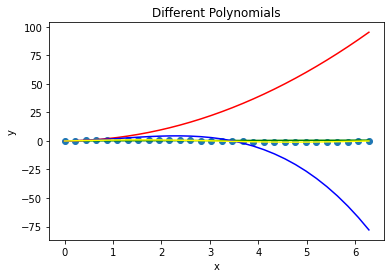

In [17]:
from matplotlib import pyplot as plt

beta0 = 0.1
beta1 = 0.1
beta2 = 2.4
beta3 = -0.7

y1values = beta0 + beta1*xvalues
y2values = beta0 + beta1*xvalues + beta2*xvalues*xvalues
y3values = beta0 + beta1*xvalues + beta2*xvalues*xvalues + beta3*xvalues*xvalues*xvalues
plt.scatter(xvalues, yvalues)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Different Polynomials")
plt.plot(xvalues, y1values, c= "green")
plt.plot(xvalues, y2values, c= "red")
plt.plot(xvalues, y3values, c= "blue")
plt.plot(xvalues, sinxvalues, c= "yellow")

### Import the linear regression model from Scikit Learn

In [18]:



from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()





We have to reshape our xvalues since the model expects a matrix

In [19]:
print(xvalues.shape) 
XValues = xvalues.reshape(nof_xvalues,1)
print(XValues.shape) 

(30,)
(30, 1)


In [20]:
linear_model.fit(X=XValues,y=yvalues) #  y = mX + b 

LinearRegression()

In [21]:
print("Resulting slope ",linear_model.coef_)
print("Resulting intercept ",linear_model.intercept_)


Resulting slope  [-0.2859424]
Resulting intercept  0.8808338697278981


Plot the resulting curve

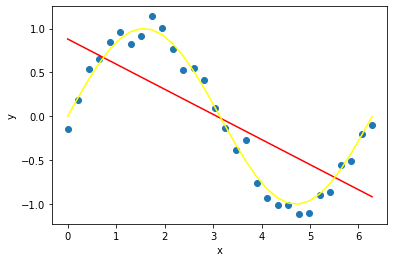

In [22]:
predict = linear_model.predict(XValues) 
plt.scatter(xvalues, yvalues)
plt.xlabel("x")
plt.ylabel("y")
#plt.title("y = mx + b")
plt.plot(xvalues, predict, c= "red")
plt.plot(xvalues, sinxvalues, c= "yellow")
plt.savefig("uf.jpg")

Let's figure out how we performed


In [27]:
from sklearn.metrics import mean_squared_error


In [28]:
mean_squared_error(yvalues, predict)


0.2421336483798213

Let's use a polynomial model now 

In [29]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
linear_model_polynomial = Pipeline([
    ("polynom", PolynomialFeatures(degree=1)),
    ("regressor", LinearRegression())
]).fit(XValues,yvalues)

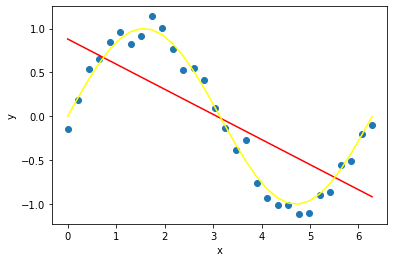

In [30]:
predict = linear_model_polynomial.predict(XValues) 
plt.scatter(xvalues, yvalues)
plt.xlabel("x")
plt.ylabel("y")
#plt.title("y = mx + b")
plt.plot(xvalues, predict, c= "red")
plt.plot(xvalues, sinxvalues, c= "yellow")
plt.savefig("of.jpg")

Let's figure out how we performed

In [31]:
mean_squared_error(yvalues, predict)

0.2421336483798213

In [32]:
print("Resulting slope ",linear_model_polynomial['regressor'].coef_)
print("Resulting intercept ",linear_model_polynomial['regressor'].intercept_)

Resulting slope  [ 0.        -0.2859424]
Resulting intercept  0.8808338697278971


Let's test the regressor with some fresh data

In [33]:
testxvalues = np.linspace(0,1, num =nof_xvalues) *2*3.14 ++np.random.random(nof_xvalues)*0.5 
XtestValues = testxvalues.reshape(nof_xvalues,1)
print(XtestValues.shape) 
testpredicted = linear_model_polynomial.predict(XValues) 

(30, 1)


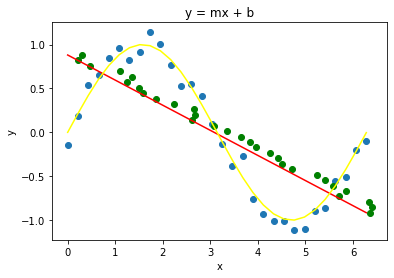

In [34]:
sintestxvalues = np.sin(testxvalues) 


plt.scatter(xvalues, yvalues, )
plt.scatter(testxvalues, testpredicted, c="g")
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = mx + b")
plt.plot(xvalues, predict, c= "red")
plt.plot(xvalues, sinxvalues, c= "yellow")

In [61]:
mean_squared_error(sintestxvalues, testpredicted)

0.1908914514840565